## **Lab 3**
### Asking a Statistical Question

#### **Problem 1**
We are performing an experiment where the temperature is critical to its reliability. For this particular experiment, the target temperature is 12 Kelvin. The thermal control system when working correctly gives temperatures distributed around 12 K with a standard deviation of 0.4 K. We would like to throw out pieces of data where the themal control system is not working correctly, and to be extra cautious also throw out pieces of data that may read differently than their true temperature.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (20,15)

##### **A)**
1. Start by exploring the data you have created with appropriate plots

[12.18764492 11.88685466 11.3963766  ... 11.15517413 11.55667043
 11.94131687]


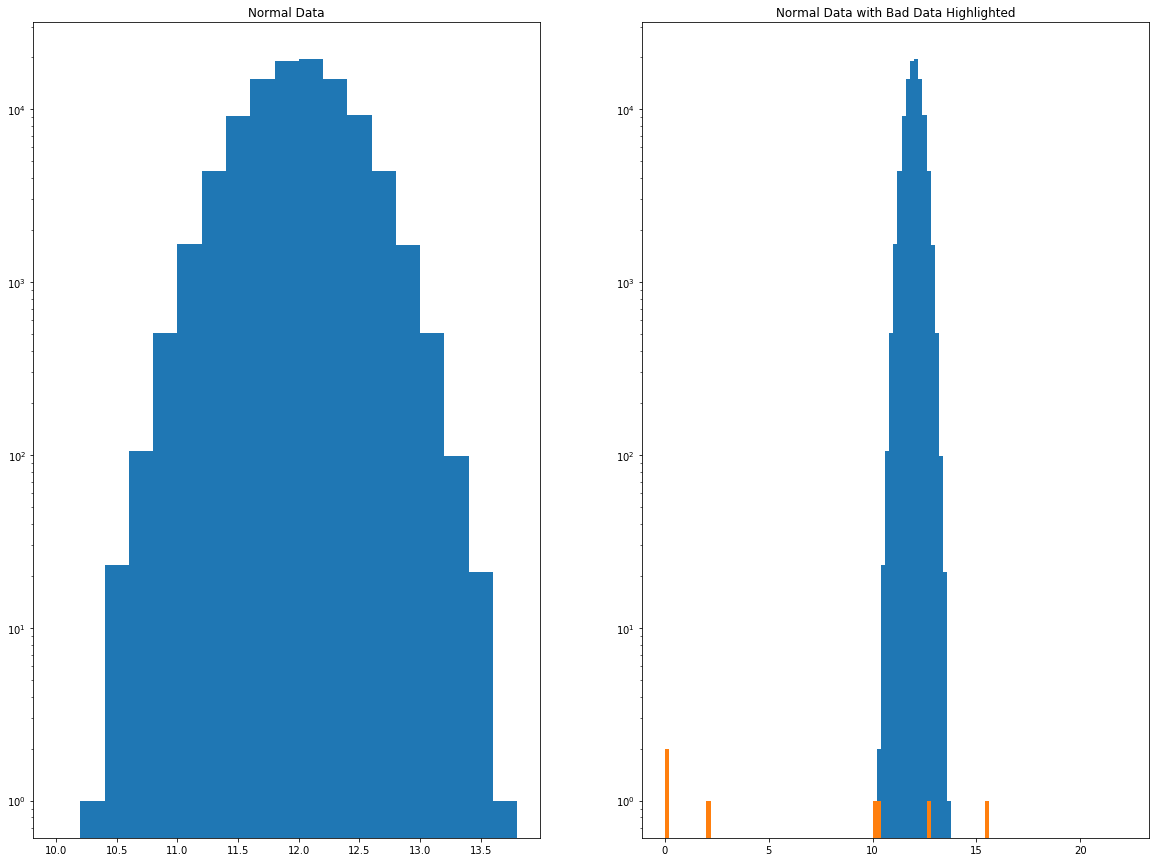

In [32]:
fig,(ax1,ax2) = plt.subplots(1,2)
#Setting the seed
np.random.seed(123456)
#Generating Data
d = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
ax1.hist(d, np.arange(10,14,0.2))
#Adding Bad Data
bad = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
d = np.append(d,bad)
ax2.hist(d, np.arange(0,22.3,0.2))
ax2.hist(bad, np.arange(0,22.3,0.2))
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.title.set_text('Normal Data')
ax2.title.set_text('Normal Data with Bad Data Highlighted')
plt.show()

2. State the statistical question in words. Be very clear, and describe why you have chosen this statistical question

For each temperature measurement T, what is the probability that a measurement that far or further from the mean would arrise from the distribution of temperature values assuming a gaussian distribution centered at 12 Kelvin with a standard deviation of 0.4 Kelvin? How does this differentiator perform with a statistical threshold of 3 $\sigma$

3. Restate your question in math. Be very clear
$\DeclareMathOperator\erf{erf}$
$\DeclareMathOperator\icdf{icdf}$
$$P(T) = 2 * \int_{|T-12|}^{\infty}\frac{1}{0.4}e^{-\frac{1}{2}\left(\frac{x}{0.4}\right)^2}$$
In order to represent that value in $\sigma$ the probability value must be plugged into the inverse cdf to find where that would occur on the standard normal.
$$\icdf(p) = \sqrt{2}\erf^{-1}(2p-1)$$

4. Apply your statistical test and construct a truth table

In [59]:
#Maintaining the Same Seed
np.random.seed(123456)

d = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
bad = np.array([10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])

#Initializing Counts for Truth Table
trueT_good = 0
trueT_bad = 0
badT_good = 0
badT_bad = 0

cutoff = 3
# modifying for absolute delta from mean
d = abs(d-12)
bad = abs(bad-12)
P1 = 2*stats.norm.cdf(-d,scale = 0.4)
P1 = 1-P1
sigma1 = stats.norm.ppf(P1,loc=0,scale=1)
for i in sigma1:
    if i >= cutoff:
        trueT_bad += 1
    else:
        trueT_good += 1
print('True T predicted True:', trueT_good, '\nTrue T predicted Bad:', trueT_bad, '\nSum:', trueT_good+trueT_bad)
P2 = 2*stats.norm.cdf(-bad,scale = 0.4)
P2 = 1-P2
sigma2 = stats.norm.ppf(P2,loc=0,scale=1)
for i in sigma2:
    if i >= cutoff:
        badT_bad += 1
    else:
        badT_good += 1
print()
print('Bad T predicted True', badT_good,'\nBad T predicted Bad', badT_bad,'\nSum', badT_good+badT_bad)

True T predicted True: 99890 
True T predicted Bad: 110 
Sum: 100000

Bad T predicted True 1 
Bad T predicted Bad 7 
Sum 8


Truth Table with Threshold at $3\sigma$:

|                 | True T | Bad T |
|-----------------|--------|-------|
| Predicted True: | 99,890 |     1 |
| Predicted Bad:  |    110 |     7 |

##### **B)** How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?

In [67]:
#Maintaining the Same Seed
np.random.seed(123456)

d = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
bad = np.array([10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])

#Initializing Counts for Truth Table
trueT_good = 0
trueT_bad = 0
badT_good = 0
badT_bad = 0

cutoff = 2
# modifying for absolute delta from mean
d = abs(d-12)
bad = abs(bad-12)
P1 = 2*stats.norm.cdf(-d,scale = 0.4)
P1 = 1-P1
sigma1 = stats.norm.ppf(P1,loc=0,scale=1)
print('cutoff is 2 sigma')
for i in sigma1:
    if i >= cutoff:
        trueT_bad += 1
    else:
        trueT_good += 1
print('True T predicted True:', trueT_good, '\nTrue T predicted Bad:', trueT_bad, '\nSum:', trueT_good+trueT_bad)
P2 = 2*stats.norm.cdf(-bad,scale = 0.4)
P2 = 1-P2
sigma2 = stats.norm.ppf(P2,loc=0,scale=1)
for i in sigma2:
    if i >= cutoff:
        badT_bad += 1
    else:
        badT_good += 1
print()
print('Bad T predicted True', badT_good,'\nBad T predicted Bad', badT_bad,'\nSum', badT_good+badT_bad)

cutoff = 2.5
trueT_good = 0
trueT_bad = 0
badT_good = 0
badT_bad = 0
print()
print('cutoff is 2.5 sigma')
for i in sigma1:
    if i >= cutoff:
        trueT_bad += 1
    else:
        trueT_good += 1
print('True T predicted True:', trueT_good, '\nTrue T predicted Bad:', trueT_bad, '\nSum:', trueT_good+trueT_bad)

for i in sigma2:
    if i >= cutoff:
        badT_bad += 1
    else:
        badT_good += 1
print()
print('Bad T predicted True', badT_good,'\nBad T predicted Bad', badT_bad,'\nSum', badT_good+badT_bad)

cutoff = 3.5
trueT_good = 0
trueT_bad = 0
badT_good = 0
badT_bad = 0
print()
print('cutoff is 3.5 sigma')
for i in sigma1:
    if i >= cutoff:
        trueT_bad += 1
    else:
        trueT_good += 1
print('True T predicted True:', trueT_good, '\nTrue T predicted Bad:', trueT_bad, '\nSum:', trueT_good+trueT_bad)

for i in sigma2:
    if i >= cutoff:
        badT_bad += 1
    else:
        badT_good += 1
print()
print('Bad T predicted True', badT_good,'\nBad T predicted Bad', badT_bad,'\nSum', badT_good+badT_bad)

cutoff = 4
trueT_good = 0
trueT_bad = 0
badT_good = 0
badT_bad = 0
print()
print('cutoff is 4 sigma')
for i in sigma1:
    if i >= cutoff:
        trueT_bad += 1
    else:
        trueT_good += 1
print('True T predicted True:', trueT_good, '\nTrue T predicted Bad:', trueT_bad, '\nSum:', trueT_good+trueT_bad)

for i in sigma2:
    if i >= cutoff:
        badT_bad += 1
    else:
        badT_good += 1
print()
print('Bad T predicted True', badT_good,'\nBad T predicted Bad', badT_bad,'\nSum', badT_good+badT_bad)

cutoff is 2 sigma
True T predicted True: 97711 
True T predicted Bad: 2289 
Sum: 100000

Bad T predicted True 1 
Bad T predicted Bad 7 
Sum 8

cutoff is 2.5 sigma
True T predicted True: 99370 
True T predicted Bad: 630 
Sum: 100000

Bad T predicted True 1 
Bad T predicted Bad 7 
Sum 8

cutoff is 3.5 sigma
True T predicted True: 99980 
True T predicted Bad: 20 
Sum: 100000

Bad T predicted True 1 
Bad T predicted Bad 7 
Sum 8

cutoff is 4 sigma
True T predicted True: 100000 
True T predicted Bad: 0 
Sum: 100000

Bad T predicted True 1 
Bad T predicted Bad 7 
Sum 8


Truth Table with Threshold at $2\sigma$:

|                 | True T | Bad T |
|-----------------|--------|-------|
| Predicted True: | 97,711 |     1 |
| Predicted Bad:  |   2289 |     7 |

Truth Table with Threshold at $2.5\sigma$:

|                 | True T | Bad T |
|-----------------|--------|-------|
| Predicted True: | 99,370 |     1 |
| Predicted Bad:  |    630 |     7 |

Truth Table with Threshold at $3.5\sigma$:

|                 | True T | Bad T |
|-----------------|--------|-------|
| Predicted True: | 99,980 |     1 |
| Predicted Bad:  |     20 |     7 |

Truth Table with Threshold at $4\sigma$:

|                 | True T | Bad T |
|-----------------|--------|-------|
| Predicted True: | 100,000|     1 |
| Predicted Bad:  |       0|     7 |

The trials above show how the truth tables changed as the $\sigma$ threshold changed. As the threshold increased, the number of pieces of good data that needed to be thrown out decreased. At a threshold of $4\sigma$ the number of good data points thrown out was reduced to zero while the performance in classifying bad data pieces did not change.

This quantity is predictable, the probability that corresponds to a $2\sigma$ measurement or a $4\sigma$ measurement is known, so multiplying that probability by the 100,000 data points would give the number of data points you would expect to find outside of the threshold. For example there is a 2.28% chance of the standard normal giving a value $2\sigma$ or more greater than the mean. This probability predicts 2,280 of 100,000 events to be misclassified and my algorithm misclassified 2289. For a measurement of $3\sigma$ or more greater than the mean there is a probability of 0.13% giving 130 out of 100,000 measurements misclassified, and my algorithm misclassified 110.

##### **C)**  Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

There is 1 common mistake that makes it through the threshold in all of the tests done so far. This is the value of 12.7.

In [68]:
P = 2*stats.norm.cdf(-0.7,scale = 0.4)
P = 1-P
sigma = stats.norm.ppf(P,loc=0,scale=1)
print(sigma)

1.404276170241102


In order to avoid this mistake, the threshold would need to be set below $1.404\sigma$

In [69]:
#Maintaining the Same Seed
np.random.seed(123456)

d = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
bad = np.array([10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])

#Initializing Counts for Truth Table
trueT_good = 0
trueT_bad = 0
badT_good = 0
badT_bad = 0

cutoff = 1.4
# modifying for absolute delta from mean
d = abs(d-12)
bad = abs(bad-12)
P1 = 2*stats.norm.cdf(-d,scale = 0.4)
P1 = 1-P1
sigma1 = stats.norm.ppf(P1,loc=0,scale=1)
for i in sigma1:
    if i >= cutoff:
        trueT_bad += 1
    else:
        trueT_good += 1
print('True T predicted True:', trueT_good, '\nTrue T predicted Bad:', trueT_bad, '\nSum:', trueT_good+trueT_bad)
P2 = 2*stats.norm.cdf(-bad,scale = 0.4)
P2 = 1-P2
sigma2 = stats.norm.ppf(P2,loc=0,scale=1)
for i in sigma2:
    if i >= cutoff:
        badT_bad += 1
    else:
        badT_good += 1
print()
print('Bad T predicted True', badT_good,'\nBad T predicted Bad', badT_bad,'\nSum', badT_good+badT_bad)

True T predicted True: 91979 
True T predicted Bad: 8021 
Sum: 100000

Bad T predicted True 0 
Bad T predicted Bad 8 
Sum 8


With the threshold set at $1.4\sigma$ there were no pieces of bad data used, but there were 8021 more pieces of good data thrown away in order to remove that 1 piece of data. with over 90,000 pieces of good data remaining, this may be a worthy pursuit if the data at a temperature of 12.7 is verified as being at a temperature unfit to perform the experiment at.

#### **Problem 2**

When looking for asteroids in consecutive images, the stars in the background don't perfectly allign due to atmospheric and instrumental effects even after factoring in the earth rotation, and the starts normal movements. Since we are looking at an image this results in a 2 dimentional distribution, for this example we are assuming a 2D Gaussian with a RMS of 1 arcsecond.

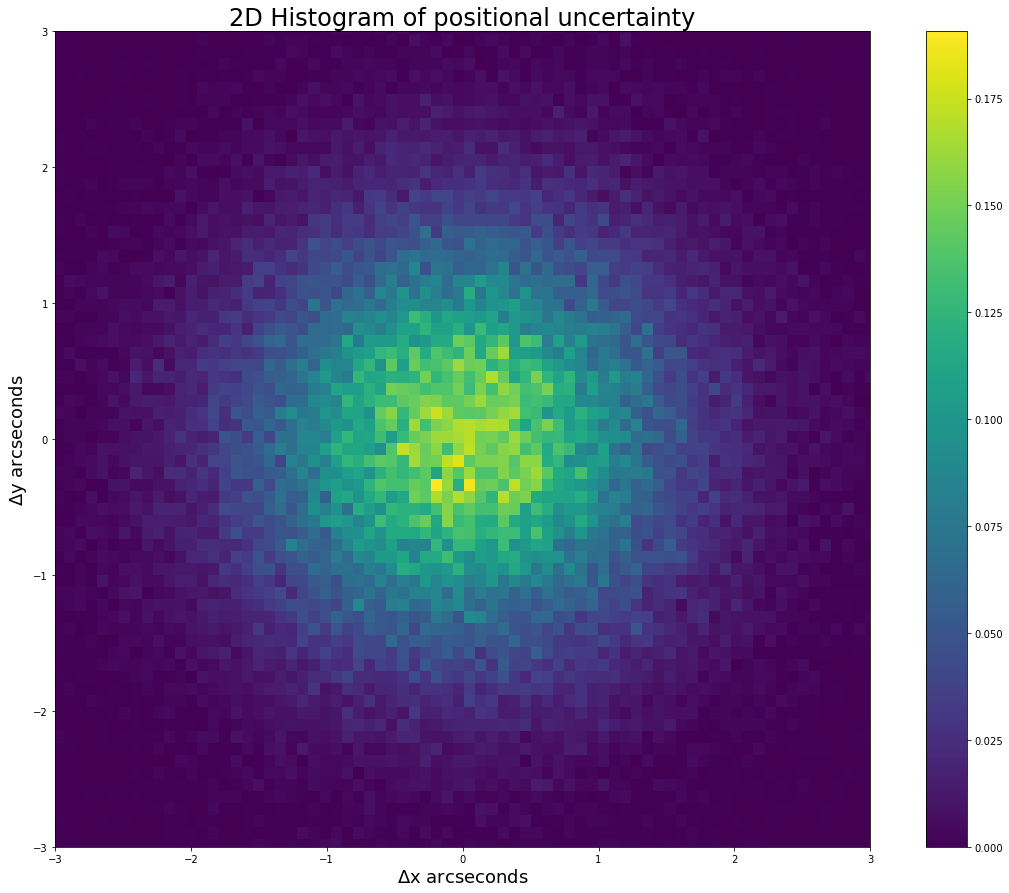

In [78]:
np.random.seed(123456)
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)
plt.show()

When looking for real movement of an asteroid, we want to get a $5\sigma$ measurement of displacement. What is that distance in arcseconds?

1. What is the question in words?

What is the magnitude of the distance vector corresponding to two independently generated Gaussian distributed random variables that corresponds to a $5\sigma$ measurement?

2. What is the question in math?

The distribution of the magnitude of a vector composed of two independently generated Gaussian distributed random variables with the same parameters is a Rayleigh distribution as proved in homework 3. The pdf of a Rayleigh distribution is given below:

$$p(x) = \frac{x}{\sigma^2}e^{-\frac{x^2}{2\sigma^2}}$$

In this example, sigma is 1 arcsecond, and the probability is given by the standard normal distribution.

$$5\sigma = \int_{a}^{\infty}xe^{-\frac{x^2}{2}} = -e^{-\frac{x^2}{2}}\bigg|_{a}^{\infty} = 0 - ^-e^{-\frac{a^2}{2}}$$

$$\sqrt{-2\ln{(5\sigma)}} = a$$
3. What distance in arcseconds represents a 5 sigma detection of motion?


In [92]:
sig = stats.norm.cdf(5)
a = stats.rayleigh.ppf(sig)
print('a =',np.round(a,3))
print('ln(5 sigma)=',np.round(np.log(1-sig),4))

a = 5.489
ln(5 sigma)= -15.065


The answer found numerically above was a distance of 5.489 arcseconds. In order to use the formula found above I also printed the $\ln{(5\sigma)}$ value.

$$\sqrt{-2*(-15.065)} = 4.489$$